In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from numpy.linalg import inv
from sklearn.linear_model import LinearRegression
import statsmodels
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures

In [2]:
regions = pd.read_excel('PycharmProjects/jupyter/regions.xlsx')
regions

,Unnamed: 0,УРОВЕНЬ ЗАНЯТОСТИ НАСЕЛЕНИЯ (в процентах),ВРП на душу населения
0,Белгородская область,61.0,558.984637
1,Брянская область,56.4,275.735010
2,Владимирская область,59.5,324.310218
3,Воронежская область,57.3,405.987264
4,Ивановская область,58.1,198.415204
...,...,...,...
80,Амурская область,59.9,381.100506
81,Магаданская область,69.1,1218.582441
82,Сахалинская область,65.2,2415.868728
83,Еврейская автономная область,56.0,352.550853


In [3]:
regions.rename(columns={"Unnamed: 0": "Region", "УРОВЕНЬ ЗАНЯТОСТИ НАСЕЛЕНИЯ (в процентах)": "employment_rate", "ВРП на душу населения ": "vrp_per_capita"}, inplace=True)

In [4]:
regions


,Region,employment_rate,vrp_per_capita
0,Белгородская область,61.0,558.984637
1,Брянская область,56.4,275.735010
2,Владимирская область,59.5,324.310218
3,Воронежская область,57.3,405.987264
4,Ивановская область,58.1,198.415204
...,...,...,...
80,Амурская область,59.9,381.100506
81,Магаданская область,69.1,1218.582441
82,Сахалинская область,65.2,2415.868728
83,Еврейская автономная область,56.0,352.550853


In [5]:
regions.shape

(85, 3)

<AxesSubplot:xlabel='vrp_per_capita', ylabel='employment_rate'>

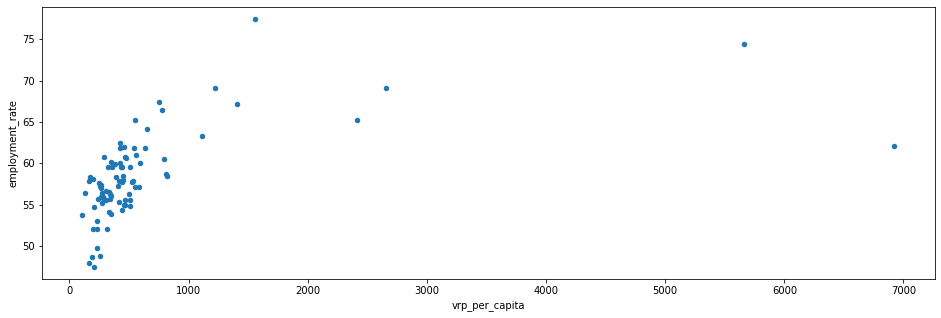

In [6]:
fig = plt.figure(figsize=(16,5))
ax1 = plt.subplot(111)

regions.plot.scatter('vrp_per_capita','employment_rate',ax = ax1)

In [7]:
regions.dtypes

Region              object
employment_rate    float64
vrp_per_capita     float64
dtype: object

In [8]:
regions[regions.vrp_per_capita > 2000]

,Region,employment_rate,vrp_per_capita
20,Ненецкий автономный округ,62.1,6920.943311
60,Ханты-Мансийский автономный округ – Югра,69.1,2655.685018
61,Ямало-Ненецкий автономный округ,74.4,5664.115540
82,Сахалинская область,65.2,2415.868728


In [9]:
regions = regions[regions.vrp_per_capita < 2000]
regions

,Region,employment_rate,vrp_per_capita
0,Белгородская область,61.0,558.984637
1,Брянская область,56.4,275.735010
2,Владимирская область,59.5,324.310218
3,Воронежская область,57.3,405.987264
4,Ивановская область,58.1,198.415204
...,...,...,...
79,Хабаровский край,61.9,540.122824
80,Амурская область,59.9,381.100506
81,Магаданская область,69.1,1218.582441
83,Еврейская автономная область,56.0,352.550853


In [10]:
regions.shape

(81, 3)

<AxesSubplot:xlabel='vrp_per_capita', ylabel='employment_rate'>

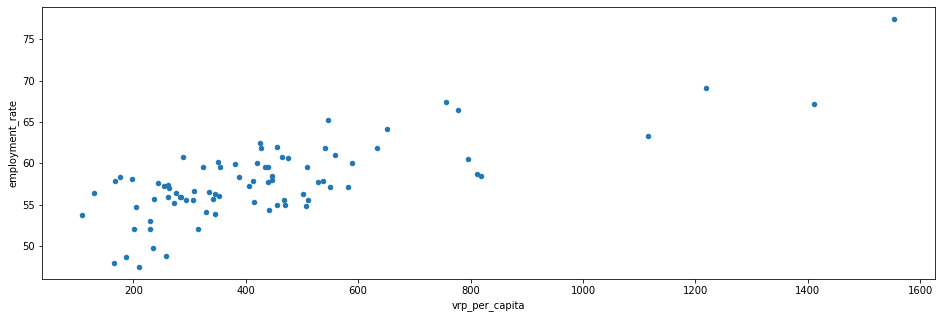

In [11]:
fig = plt.figure(figsize=(16,5))
ax1 = plt.subplot(111)

regions.plot.scatter('vrp_per_capita','employment_rate',ax = ax1)

In [12]:
X  = regions['vrp_per_capita'].values
y  = regions['employment_rate'].values


In [13]:
data_train = regions.sample(60)

In [14]:
data_test = regions.drop(data_train.index)
data_test

,Region,employment_rate,vrp_per_capita
3,Воронежская область,57.3,405.987264
5,Калужская область,60.7,464.779074
8,Липецкая область,59.6,509.482184
9,Московская область,65.2,546.329922
10,Орловская область,52.0,314.527880
16,Ярославская область,58.0,447.245811
17,г. Москва,67.2,1410.425553
18,Республика Карелия,55.0,455.971992
23,Калининградская область,62.0,455.165333
27,Псковская область,55.9,262.303945


In [15]:
data_test.shape

(21, 3)

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

Train error: 9.710692751267194
Test error: 8.27808675780043


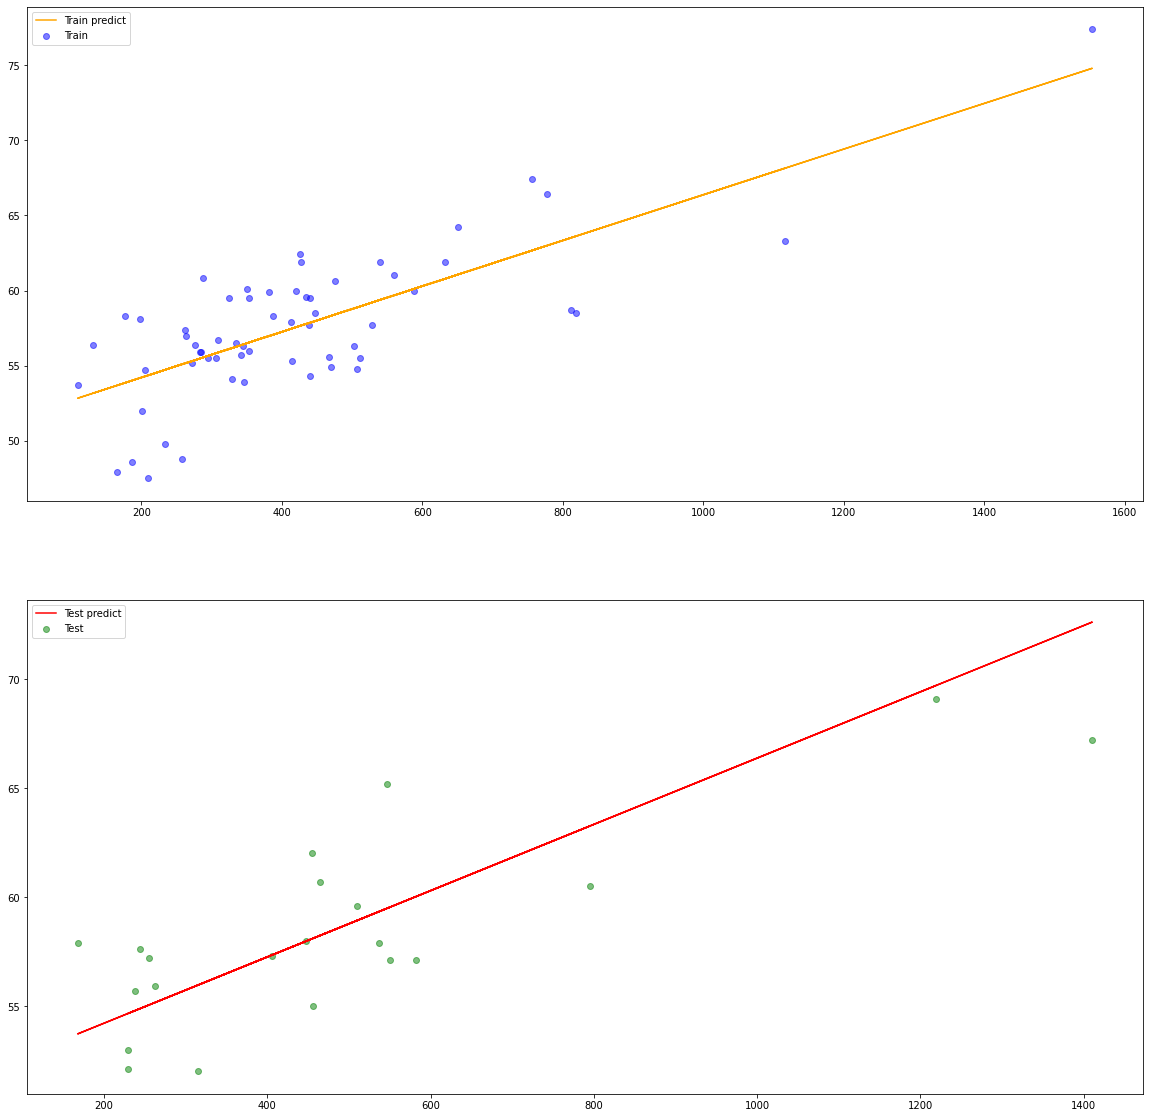

In [19]:
X_train = data_train['vrp_per_capita'].values
X_test = data_test['vrp_per_capita'].values
y_train = data_train['employment_rate'].values
y_test = data_test['employment_rate'].values

X_train = X_train.reshape((len(X_train), 1)) 
X_test = X_test.reshape((len(X_test), 1))

model = LinearRegression()  # создаем пустой объект со случайными параметрами регрессии, которые пока не описывают наши данные
model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

# fig = plt.figure(figsize=(10, 10))
# ax1 = fig.add_subplot(211)
# ах2 = fig.add_subplot(212)

fig, axes = plt.subplots(2, 1)
fig.set_figheight(20)
fig.set_figwidth(20)

axes[0].scatter(data_train.vrp_per_capita, data_train.employment_rate, color='blue', label='Train', alpha=0.5)
axes[1].scatter(data_test.vrp_per_capita, data_test.employment_rate, color='green', label='Test', alpha=0.5)
axes[0].plot(data_train.vrp_per_capita, pred_train, color='orange', label='Train predict')
axes[1].plot(data_test.vrp_per_capita, pred_test, color='red', label='Test predict')

axes[0].legend()
axes[1].legend()

print('Train error:', mean_squared_error(y_train, pred_train))
print('Test error:', mean_squared_error(y_test, pred_test))

In [20]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_train, pred_train), mean_squared_error(y_test, pred_test)

(9.710692751267194, 8.27808675780043)

In [21]:
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, pred_train),
        r2_score(y_test, pred_test)))

R^2 train: 0.573, test: 0.570


In [22]:
statmodel = smf.ols('employment_rate~vrp_per_capita',data=regions)
fitted = statmodel.fit()
fitted.params

Intercept         51.754938
vrp_per_capita     0.013776
dtype: float64

In [23]:
print (fitted.summary())

                            OLS Regression Results                            
Dep. Variable:        employment_rate   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     109.8
Date:                Tue, 10 Aug 2021   Prob (F-statistic):           1.32e-16
Time:                        15:41:14   Log-Likelihood:                -204.81
No. Observations:                  81   AIC:                             413.6
Df Residuals:                      79   BIC:                             418.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         51.7549      0.672     77.

(array([ 4.,  1.,  4., 10., 22., 13., 14.,  6.,  2.,  3.,  1.,  0.,  0.,
         0.,  1.]),
 array([47.5       , 49.49333333, 51.48666667, 53.48      , 55.47333333,
        57.46666667, 59.46      , 61.45333333, 63.44666667, 65.44      ,
        67.43333333, 69.42666667, 71.42      , 73.41333333, 75.40666667,
        77.4       ]),
 <BarContainer object of 15 artists>)

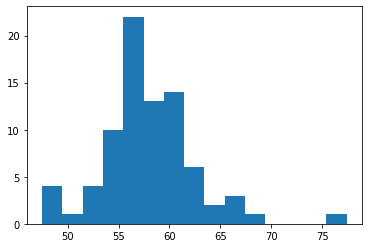

In [24]:
plt.hist(regions.employment_rate, bins = 15)

In [25]:
X_scaled = (X - X.mean())/X.std()
w0 = 100
w1 = -3

L = 0.0001  #шаг обновления весов
epochs = 500

for i in range(epochs): 
    
    w1 = w1 + L * sum(X_scaled*(y - w0 - w1*X_scaled)) 
    w0 = w0 + L * sum((y - w0 - w1*X_scaled))    
    
    plt.show()
    
#     break

print (w1, w0)

3.4633062394575624 58.5401863569647


c:\питон блеат\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


<AxesSubplot:xlabel='vrp_per_capita', ylabel='employment_rate'>

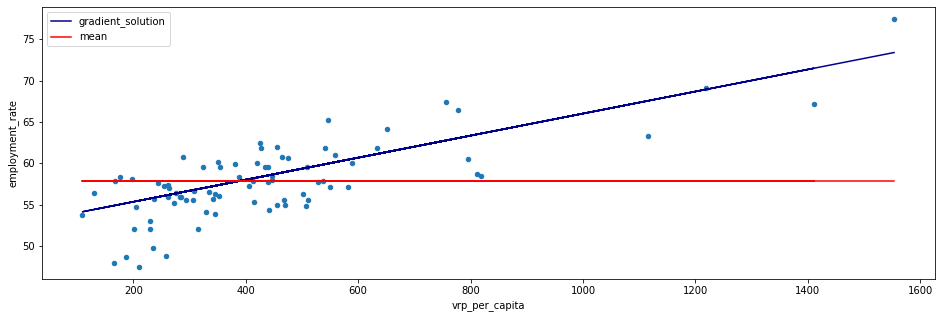

In [26]:
regions['gradient_solution'] = w0 + w1*X_scaled
regions['mean'] = regions.employment_rate.mean()
fig = plt.figure(figsize=(16,5))
ax1 = plt.subplot(111)

regions.plot.scatter('vrp_per_capita','employment_rate',ax = ax1)
regions.plot.line('vrp_per_capita','gradient_solution',ax = ax1,color = 'darkblue')

regions.plot.line('vrp_per_capita','mean',ax = ax1,color = 'red')

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=10)

y_train_pred = w0 + w1*X_train
y_test_pred = w0 + w1*X_test


print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

NameError: name 'train_test_split' is not defined

In [28]:
regions

,Region,employment_rate,vrp_per_capita,gradient_solution,mean
0,Белгородская область,61.0,558.984637,60.127055,57.817284
1,Брянская область,56.4,275.735010,56.347842,57.817284
2,Владимирская область,59.5,324.310218,56.995949,57.817284
3,Воронежская область,57.3,405.987264,58.085712,57.817284
4,Ивановская область,58.1,198.415204,55.316215,57.817284
...,...,...,...,...,...
79,Хабаровский край,61.9,540.122824,59.875394,57.817284
80,Амурская область,59.9,381.100506,57.753664,57.817284
81,Магаданская область,69.1,1218.582441,68.927633,57.817284
83,Еврейская автономная область,56.0,352.550853,57.372745,57.817284


In [32]:
X_scaled = (X - X.mean())/X.std()

w = [100, -3]
def f(w): return ((y - w[0] - w[1]*X_scaled)**2).sum()/len(X_scaled)
def df1(w): return -2/len(X_scaled)*(y - w[0] - w[1]*X_scaled).sum()
def df2(w): return -2/len(X_scaled)*((y - w[0] - w[1]*X_scaled)*X_scaled).sum()

L = 0.01  #шаг обновления весов
eps = 0.0001

while np.sqrt(df1(w)**2 + df2(w)**2) > eps:
    w1 = w - L*([df1(w), df2(w)]/np.sqrt(df1(w)**2 + df2(w)**2))
    while f(w1) > f(w):
        L = L/2
        w1 = w - L*([df1(w), df2(w)]/np.sqrt(df1(w)**2 + df2(w)**2))
    w = w1;

print(w)


[57.81731242  3.57599743]


c:\питон блеат\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


<AxesSubplot:xlabel='vrp_per_capita', ylabel='employment_rate'>

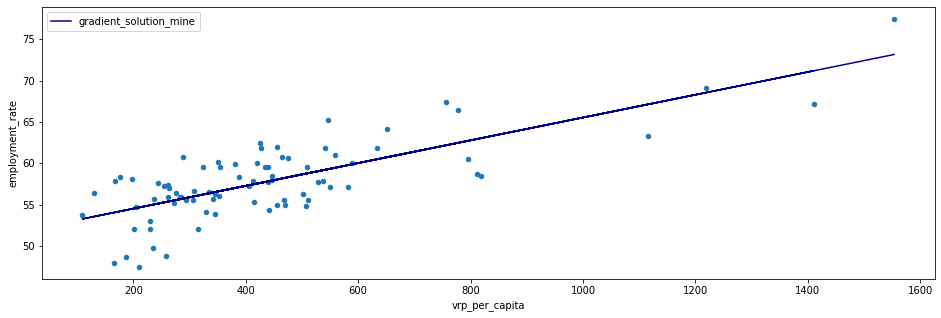

In [33]:
regions['gradient_solution_mine'] = w[0] + w[1]*X_scaled
fig = plt.figure(figsize=(16,5))
ax1 = plt.subplot(111)

regions.plot.scatter('vrp_per_capita','employment_rate',ax = ax1)
regions.plot.line('vrp_per_capita','gradient_solution_mine',ax = ax1,color = 'darkblue')

In [31]:
regions

,Region,employment_rate,vrp_per_capita,gradient_solution,mean,gradient_solution_mine
0,Белгородская область,61.0,558.984637,60.127055,57.817284,57.817237
1,Брянская область,56.4,275.735010,56.347842,57.817284,57.817237
2,Владимирская область,59.5,324.310218,56.995949,57.817284,57.817237
3,Воронежская область,57.3,405.987264,58.085712,57.817284,57.817237
4,Ивановская область,58.1,198.415204,55.316215,57.817284,57.817237
...,...,...,...,...,...,...
79,Хабаровский край,61.9,540.122824,59.875394,57.817284,57.817237
80,Амурская область,59.9,381.100506,57.753664,57.817284,57.817237
81,Магаданская область,69.1,1218.582441,68.927633,57.817284,57.817237
83,Еврейская автономная область,56.0,352.550853,57.372745,57.817284,57.817237


In [34]:
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [36]:
poly = PolynomialFeatures(degree=2)
poly.fit_transform(X)


array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [37]:
from sklearn.pipeline import Pipeline
model = Pipeline([('poly', PolynomialFeatures(degree=3)), ('linear', LinearRegression(fit_intercept=False))])
# fit to an order-3 polynomial data
x = np.arange(5)
y = 3 - 2 * x + x ** 2 - x ** 3
model = model.fit(x[:, np.newaxis], y)
model.named_steps['linear'].coef_


array([ 3., -2.,  1., -1.])

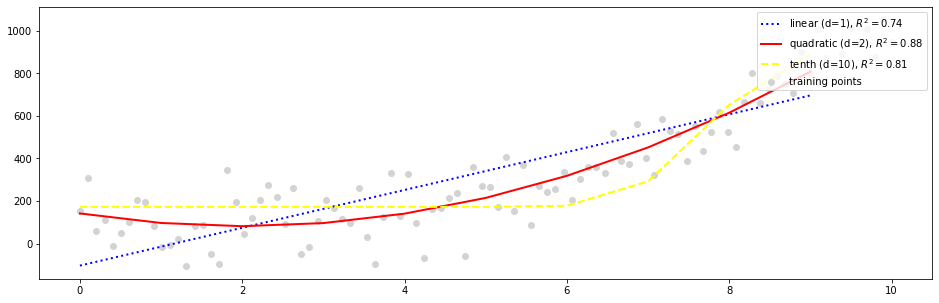

In [38]:
n_samples = 100
X = np.linspace(0, 10, 100)
y = X ** 3 + np.random.randn(n_samples) * 100 + 100

X = X.reshape(-1,1)

regr = LinearRegression()

# create quadratic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
tenth = PolynomialFeatures(degree=40)
X_quad = quadratic.fit_transform(X)
X_tenth = tenth.fit_transform(X)

# fit features
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_tenth, y)
y_tenth_fit = regr.predict(tenth.fit_transform(X_fit))
tenth_r2 = r2_score(y, regr.predict(X_tenth))

fig = plt.figure(figsize=(16,5))

# plot results
plt.scatter(X, y, label='training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='linear (d=1), $R^2={:.2f}$'.format(linear_r2), 
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         label='quadratic (d=2), $R^2={:.2f}$'.format(quadratic_r2),
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_tenth_fit, 
         label='tenth (d=10), $R^2={:.2f}$'.format(tenth_r2),
         color='yellow', 
         lw=2, 
         linestyle='--')

plt.legend(loc='upper right')
plt.show()